In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
# from scipy.spatial.transform import Rotation as R
%matplotlib widget


In [2]:
def deg2rad(deg):
    return deg * 2 * np.pi / 360

In [3]:
def rad2deg(rad):
    return rad / (2 * np.pi) * 360

In [4]:
def Rzy(theta=0, psi=0):
    R = np.array([[np.cos(psi) * np.cos(theta),     -np.sin(psi),    np.cos(psi) * np.sin(theta)],
                  [np.sin(psi) * np.cos(theta),    np.cos(psi),    np.sin(psi) * np.sin(theta)],
                  [-np.sin(theta),    0,              np.cos(theta)]])
    return R

In [5]:
np.linalg.det(Rzy(deg2rad(35), deg2rad(97)))

1.0

In [6]:
# Phi is angle about z-axis, theta is angle about y-axis
theta = deg2rad(0)
psi = deg2rad(0)

R = Rzy(theta, psi)

ne =np.array([0, 0, 1]) 
nb = R @ ne

# Define the components of the arrow direction
origin = np.array([0,0,0])

# Axis vectors
X = np.array([1, 0, 0])
Y = np.array([0, 1, 0])
Z = np.array([0, 0, 1])

axis = np.array([X, Y, Z])

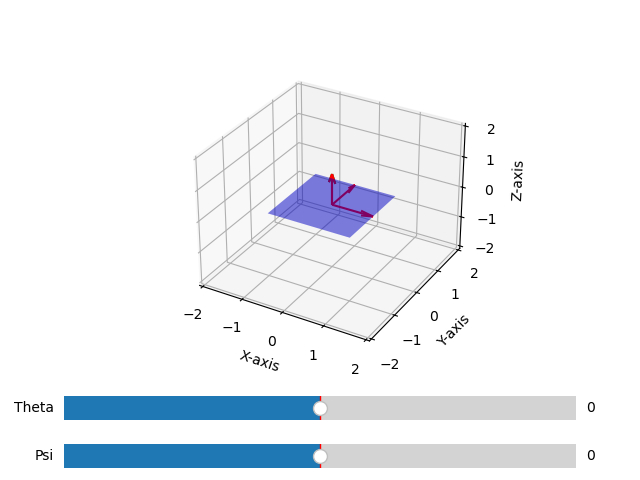

In [7]:
x = np.linspace(-1, 1, 3)
y = np.linspace(-1, 1, 3)
x, y = np.meshgrid(x, y)

ze = (-ne[0] * x - ne[1] * y) / ne[2]
zb = (-nb[0] * x - nb[1] * y) / nb[2]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.subplots_adjust(bottom=0.25)

def plot_origin(ax):
    # Plot axis and origin
    ax.quiver(*origin, axis[:,0], axis[:,1], axis[:,2], color='r', length=1)
    ax.quiver(*origin, *ne, color='g', length=2)
    ax.quiver(*origin, *nb, color='b', length=2)
    ax.scatter(*origin, color='c')

    # Plot the plane
    ax.plot_surface(x, y, ze, alpha=0.5, rstride=100, cstride=100, color='g')

def set_plot():
    # Customize the plot
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Z-axis')

# Add sliders
def update_theta(t):
    global theta
    theta = deg2rad(t)
    update()

# Add sliders
def update_psi(t):
    global psi
    psi = deg2rad(t)
    update()

def update():
    R = Rzy(theta, psi)
    nb = R @ ne
    zb = (-nb[0] * x - nb[1] * y) / nb[2]
    
    ax.clear()
    set_plot()
    # plot_origin(ax)
    # ax.quiver(*origin, r.as_matrix()[:,0], r.as_matrix()[:,1], r.as_matrix()[:,2], color='r', normalize=True)
    ax.quiver(*origin, *R, color='r', normalize=True)
    ax.quiver(*origin, *nb, color='g', normalize=True)
    ax.plot_surface(x, y, zb, alpha=0.5, rstride=100, cstride=100, color='b')

ax_slider_psi = plt.axes([0.1, 0.0, 0.8, 0.1], facecolor='gray')
ax_slider_theta = plt.axes([0.1, 0.1, 0.8, 0.1], facecolor='gray')

psi_slider = Slider(ax_slider_psi, 'Psi', valmin=-90, valmax=90, valinit=0, valstep=1)
theta_slider = Slider(ax_slider_theta, 'Theta', valmin=-90, valmax=90, valinit=0, valstep=1)

psi_slider.on_changed(update_psi)
theta_slider.on_changed(update_theta)


# plot_origin(ax)
set_plot()
ax.quiver(*origin, *R, color='r', normalize=True)
ax.quiver(*origin, *nb, color='g', normalize=True)
ax.plot_surface(x, y, zb, alpha=0.5, rstride=100, cstride=100, color='b')

plt.show()

In [8]:
def rot_from_target(x, y, z):
    theta = np.arccos(z)
    psi = np.sign(y) * np.arccos(x / np.sin(theta))
    return Rzy(theta, psi), theta, psi

In [9]:
def angle_to_steps(angle, gear_ratio=1.0, pos=0, full_rotation=200, deg=False):
    if deg:
        da = 360 / full_rotation
    else:
        da = 2 * np.pi / full_rotation
    return round(gear_ratio * (angle - pos) / da)